In [89]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [90]:
class Particle:
    def __init__(self, r0, v0, a0, t, m=1, radius=2, Id=0):

        self.dt = t[1] - t[0]

        self.r = r0
        self.v = v0
        self.a = a0

        self.m = m
        self.radius = radius
        self.Id = Id

        self.p = self.m * self.v
        self.f = self.m * self.a


        self.R = np.zeros((len(t), len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)

        self.P = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)


        self.K = 20

        self.VEk = np.zeros(len(t))
        self.PE = np.zeros_like(self.VEk)
        
    
    def Evolution(self, i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f / self.m
        
        self.r += self.dt * self.v
        self.v += self.dt * self.a
        
        
    def CalculateForce(self, p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compression = self.radius + p.radius - d
        
        if compression >= 0:
            
            Fn = self.K * compression**3
            
            self.n = (self.r - p.r) / d
            self.f = np.add(self.f, Fn * self.n)
            
        self.PE = 0.5 * self.K * compression**2
    
    
    def ResetForce(self):
        
        self.f[:] = 0
        self.a[:] = 0
        
        
    def SetPosition(self, i):
        self.R[i] = self.r
        
        
    def SetVelocity(self, i):
        self.V[i] = self.v
        self.P[i] = self.m * self.v
        self.VEk[i] = 0.5 * self.m * np.dot(self.v, self.v)
        
        
    def GetPosition(self, scale=1):
        return self.R[::scale]
    
    def GetVelocity(self, scale=1):
        return self.V[::scale]
    
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self, scale=1):
        return self.VEk[::scale]

    def Rebote(self, i):

        pared = 20

        vinv = np.array([1, -1])
        hinv = np.array([-1, 1])
        inv = np.array([hinv, vinv])
        
        pos1 = self.R[i] + np.full(len(self.R[i]), self.radius)
        pos2 = self.R[i] - np.full(len(self.R[i]), self.radius)

        #if (j >= pared for j in pos1).any() or (j  <= -pared for j in pos2).any():   
        if np.any(pos1 >= pared) or np.any(pos2 <= -pared):
            for k in range(len(pos1)):
                if pos1[k] >= pared or pos2[k] <= -pared:
                    self.v[i] = np.dot(self.v[i], inv[k])
                
                          




In [91]:
def GetParticles(N, t):
    
    #r0 = np.array([-5.,0.])
    #v0 = np.array([10.,0])
    #a0 = np.array([0.,0.])
    
    #r1 = np.array([0.,0.])
    #v1 = np.array([0.,0.])
    #a1 = np.array([0.,0.])
    
    #r2 = np.array([4.,0.])
    #v2 = np.array([0.,0.])
    #a2 = np.array([0.,0.])
    
    #p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    #p1 = Particle(r1,v1,a1,t,m=1,radius=2,Id=1)
    #p2 = Particle(r2,v2,a2,t,m=1,radius=2,Id=1)
    
    #Particles = [p0,p1,p2]
    

    part = np.linspace(0, N-1, N)
    Particles = []

    for i in part:
        r0 = np.random.uniform(low=-20, high=20, size=2)
        v0 = np.random.uniform(low=-5, high=5, size=2)
        a0 = np.zeros(2)
        p0 = Particle(r0, v0, a0, t, m=1, radius=2, Id=i)
        Particles.append(p0)
    
    return Particles
    

In [92]:
dt = 0.001
tmax = 1
t = np.arange(0, tmax, dt)
Particles = GetParticles(3, t)

In [93]:
def RunSimulation(t, Particles):
    
    for it in range(len(t)):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].CalculateForce(Particles[j])
                    
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            Particles[i].Rebote(it)
            
    return Particles

In [94]:
Particles = RunSimulation(t, Particles)

IndexError: index 944 is out of bounds for axis 0 with size 2

In [ ]:
scale = 50
t1 = t[::scale]

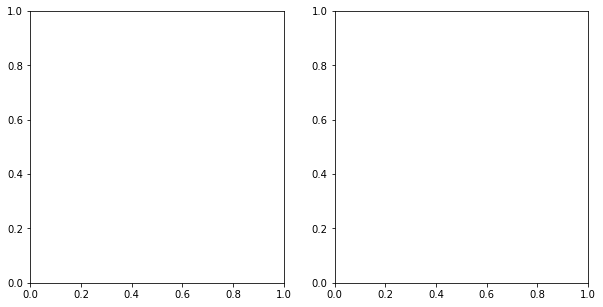

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():

    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)


def Update(i):
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))

    KE = 0

    for p in Particles:

        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]

        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]

        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)
        


RuntimeError: Requested MovieWriter (ffmpeg) not available